# Group by


eps=f(%messages)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


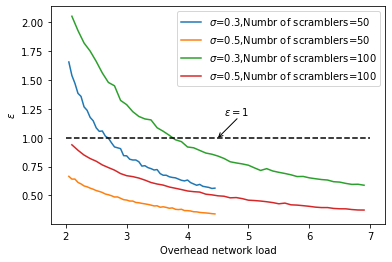

In [26]:
##################################################
%load_ext autoreload
%autoreload 2
from perf import *
from Theorical_functions import *
from Serialization import *

erase=False
tau=20
delta = 1e-4
nb_runs=4000
Plies=[0.3,0.5]
contrib_utile=10000
Nbscramblers=[50,100]
dmax=500

x_coordinates_dict = dict()
y_coordinates_dict=dict()
legend=dict()

name='epsilon_f(perf)-tradeoffs,tau_{},delta_{},dmax_{},Plies_{},Nbscramblers_{},nb_runs_{}'.format(tau,delta,dmax,Plies,Nbscramblers,nb_runs)




if do_storage_exists(name+"1") and erase==False:
    y_coordinates_dict=restore(name+"1")
    x_coordinates_dict=restore(name+"2")
    
    for nb in Nbscramblers:
        for P in Plies:
            S_total=int(contrib_utile/(1-P))
            legend['P={},Nbscramblers={}'.format(P,nb)]="$\sigma$={},Numbr of scramblers={}".format(P,nb)

else:
    

    for nb in Nbscramblers:
        for P in Plies:
            y_coordinates_dict['P={},Nbscramblers={}'.format(P,nb)]=[]
            x_coordinates_dict['P={},Nbscramblers={}'.format(P,nb)]=[]
            legend['P={},Nbscramblers={}'.format(P,nb)]="$\sigma$={},Number of scramblers={}".format(P,nb)


    for d in range(10,dmax,10): 
        print("d=",d,end="\r",flush=True)
        for nb in Nbscramblers:
            for P in Plies:
                S_total=int(contrib_utile/(1-P))
                n=int(S_total/nb)
                y_coordinates_dict['P={},Nbscramblers={}'.format(P,nb)].append(get_epsilon_Semi_TH_optimized(tau,P,n,d,delta,nb_runs))
                x_coordinates_dict['P={},Nbscramblers={}'.format(P,nb)].append(number_of_messages_GB(tau,S_total,n,d)/(contrib_utile))


    
    store(name+"1",y_coordinates_dict)
    store(name+"2",x_coordinates_dict)



for y_coordinates in y_coordinates_dict:
    plt.plot(x_coordinates_dict[y_coordinates], y_coordinates_dict[y_coordinates], label=legend[y_coordinates])
plt.legend()

plt.annotate('$\\varepsilon=1$', xy=(4.5, 1), xytext=(4.6, 1.2),
            arrowprops=dict(arrowstyle="->",
                            shrinkA=0, shrinkB=0,
                            connectionstyle="angle,angleA=0,angleB=45,rad=10"),
            )


X=[2,7]
Y=[1,1]
plt.plot(X, Y,'k--')

plt.xlabel('Overhead network load')
plt.ylabel('$\\varepsilon$')

#plt.xlim(100, 500)
#plt.ylim(0, 2.2)

saveFig(name)
##################################################








    

eps=f(nb secure channels) (Plie fixé)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


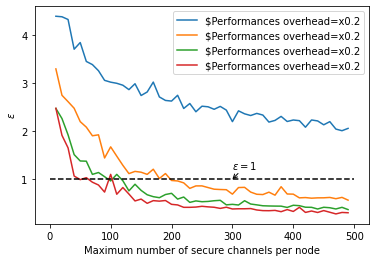

In [34]:
##################################################
%load_ext autoreload
%autoreload 2
from perf import *
from Theorical_functions import *
from Serialization import *

def allowed_d(rate,sampling,n):
    d=int(rate*(1-sampling)*n-2*n)
    return max(0,d)

erase=False
tau=20
delta = 1e-4
nb_runs=50
Plies=[0.2]
contrib_utile=10000
rates=[2,4,6,8]
nmax=500

x_coordinates_dict = dict()
y_coordinates_dict=dict()
legend=dict()

name='epsilon_f(perf_securechannels)-tradeoffs,tau_{},delta_{},nmax_{},Plies_{},rates{},nb_runs_{}'.format(tau,delta,nmax,Plies,rates,nb_runs)




if do_storage_exists(name+"1") and erase==False:
    y_coordinates_dict=restore(name+"1")
    x_coordinates_dict=restore(name+"2")
    
    for rate in rates:
        for P in Plies:
            legend['P={},rate={}'.format(P,rate)]="$\sigma$={} Performances overhead=x{}".format(P,rate)

else:
    

    for rate in rates:
        for P in Plies:
            y_coordinates_dict['P={},rate={}'.format(P,rate)]=[]
            x_coordinates_dict['P={},rate={}'.format(P,rate)]=[]
            legend['P={},rate={}'.format(P,rate)]="$Performances overhead=x{}".format(P,rate)


    for n in range(10,nmax,10): 
        print("n=",n,end="\r",flush=True)
        for rate in rates:
            for P in Plies:
                d=allowed_d(rate,P,n)
                y_coordinates_dict['P={},rate={}'.format(P,rate)].append(get_epsilon_Semi_TH_optimized(tau,P,n,d,delta,nb_runs))
                x_coordinates_dict['P={},rate={}'.format(P,rate)].append(n)


    
    store(name+"1",y_coordinates_dict)
    store(name+"2",x_coordinates_dict)


           

for y_coordinates in y_coordinates_dict:
    plt.plot(x_coordinates_dict[y_coordinates], y_coordinates_dict[y_coordinates], label=legend[y_coordinates])
plt.legend()

plt.annotate('$\\varepsilon=1$', xy=(300, 1), xytext=(300, 1.2),
            arrowprops=dict(arrowstyle="->",
                            shrinkA=0, shrinkB=0,
                            connectionstyle="angle,angleA=0,angleB=45,rad=10"),
            )


X=[0,500]
Y=[1,1]
plt.plot(X, Y,'k--')

plt.xlabel('Maximum number of secure channels per node')
plt.ylabel('$\\varepsilon$')

#plt.xlim(100, 500)
#plt.ylim(0, 2.2)

saveFig(name)
##################################################








    

eps=f(secure channels) (d fixé)

In [ ]:
##################################################
%load_ext autoreload
%autoreload 2
from perf import *
from Theorical_functions import *
from Serialization import *

def allowed_P(rate,d,n):
    P=1-((d+2*n)/(rate*n))
    return max(0.001,P)

erase=False

tau=20
delta = 1e-4
nb_runs=500
ds=[250,500]
contrib_utile=10000
rates=[4,6]
nmax=500

x_coordinates_dict = dict()
y_coordinates_dict=dict()
legend=dict()

name='epsilon_f(perf_securechannels)-tradeoffs,tau_{},delta_{},nmax_{},ds{},rates{},nb_runs_{}'.format(tau,delta,nmax,ds,rates,nb_runs)


for rate in rates:
    for d in ds:
        legend['d={},rate={}'.format(d,rate)]="$d={},Performances overhead=x{}".format(d,rate)

if do_storage_exists(name+"1") and erase==False:
    y_coordinates_dict=restore(name+"1")
    x_coordinates_dict=restore(name+"2")
    


else:
    

    for rate in rates:
        for d in ds:
            y_coordinates_dict['d={},rate={}'.format(d,rate)]=[]
            x_coordinates_dict['d={},rate={}'.format(d,rate)]=[]


    for n in range(10,nmax,10): 
        print("n=",n,end="\r",flush=True)
        for rate in rates:
            for d in ds:
                P=allowed_P(rate,d,n)
                y_coordinates_dict['d={},rate={}'.format(d,rate)].append(get_epsilon_Semi_TH_optimized(tau,P,n,d,delta,nb_runs))
                x_coordinates_dict['d={},rate={}'.format(d,rate)].append(n)


    
    store(name+"1",y_coordinates_dict)
    store(name+"2",x_coordinates_dict)


           

for y_coordinates in y_coordinates_dict:
    plt.plot(x_coordinates_dict[y_coordinates], y_coordinates_dict[y_coordinates], label=legend[y_coordinates])
plt.legend()

plt.annotate('$\\varepsilon=1$', xy=(300, 1), xytext=(300, 1.2),
            arrowprops=dict(arrowstyle="->",
                            shrinkA=0, shrinkB=0,
                            connectionstyle="angle,angleA=0,angleB=45,rad=10"),
            )


X=[0,500]
Y=[1,1]
plt.plot(X, Y,'k--')

plt.xlabel('Maximum number of secure channels per node')
plt.ylabel('$\\varepsilon$')

#plt.xlim(100, 500)
#plt.ylim(0, 4)

saveFig(name)
##################################################








    

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


eps=f(utility)